In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('cancerxx.csv')
df_adults=pd.read_csv('samadult.csv')

In [30]:
df.shape

(33672, 610)

In [48]:
df_adults.shape

(33672, 650)

In [49]:
df_adults.columns

Index(['FPX', 'FMX', 'HHX', 'INTV_QRT', 'WTIA_SA', 'WTFA_SA', 'SEX',
       'HISPAN_I', 'R_MARITL', 'MRACRPI2',
       ...
       'NIGHTFRP', 'AWEBUSE', 'AWEBOFNO', 'AWEBOFTP', 'AWEBORP', 'AWEBEML',
       'AWEBMNO', 'AWEBMTP', 'SMKAGX_P', 'SMKNOX_P'],
      dtype='object', length=650)

In [79]:
df['HHX'].value_counts()

HHX
45295    6
44463    5
1006     5
83566    5
51836    5
        ..
28519    1
28518    1
28517    1
28515    1
85444    1
Name: count, Length: 33067, dtype: int64

In [78]:
df['FMX'].value_counts()

FMX
1    33012
2      513
3       99
4       29
5       16
6        3
Name: count, dtype: int64

In [77]:
df['FPX'].value_counts()

FPX
1     23623
2      8344
3      1171
4       342
5       112
6        50
7        14
8        11
11        2
10        2
12        1
Name: count, dtype: int64

In [80]:
df.loc[:, ['HHX', 'FMX', 'FPX']].duplicated().sum()

0

In [81]:
df_adults.loc[:, ['HHX', 'FMX', 'FPX']].duplicated().sum()

0

In [83]:
(df.loc[:, ['HHX', 'FMX', 'FPX']]==df_adults.loc[:, ['HHX', 'FMX', 'FPX']]).mean()

HHX    1.0
FMX    1.0
FPX    1.0
dtype: float64

In [50]:
df_adults['SEX'].value_counts()

SEX
2    18601
1    15071
Name: count, dtype: int64

In [51]:
mask_male=(df_adults['SEX']==1)

In [53]:
(df_adults.loc[mask_male, 'APSPAP'].isna().mean())

1.0

In [84]:
mask_female=(df_adults['SEX']==2)

In [90]:
df[mask_female].shape

(18601, 610)

In [92]:
df_female=df[mask_female]

In [93]:
(df_female.loc[:, 'PAP6YR1'].isna().sum())

2544

In [94]:
df_female.loc[:, 'PAP6YR1'].shape

(18601,)

In [96]:
df_female.loc[mask_female, 'PAPHAD1'].value_counts()

PAPHAD1
1.0    16057
8.0     1221
2.0     1188
7.0       76
9.0       59
Name: count, dtype: int64

In [97]:
df_female['PAPHAD1'].isna().sum()

0

In [142]:
notna_mask=((df_female['PAP6YR1']!=97) & (df_female['PAP6YR1']!=98) & (df_female['PAP6YR1']!=99) & df_female['PAP6YR1'].notna())

In [143]:
notna_mask.value_counts()

PAP6YR1
True     15647
False     2954
Name: count, dtype: int64

In [154]:
df_female_clean=df_female[notna_mask]
df_female_clean_info=df_adults[(df_adults['SEX']==2) & notna_mask]


In [155]:
df_female_clean_info.shape

(15647, 650)

In [156]:
df_female_clean_info.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,NIGHTFRP,AWEBUSE,AWEBOFNO,AWEBOFTP,AWEBORP,AWEBEML,AWEBMNO,AWEBMTP,SMKAGX_P,SMKNOX_P
1,1,1,11,1,4400.0,5018,2,12,7,1,...,NaN,1,1.0,1.0,2.0,1,1.0,1.0,NaN,NaN
4,1,1,21,1,2450.4,2846,2,12,4,2,...,NaN,1,1.0,1.0,2.0,1,NaN,NaN,NaN,NaN
5,2,1,23,1,7087.7,9427,2,12,1,1,...,NaN,1,1.0,1.0,2.0,1,NaN,NaN,NaN,NaN
6,2,1,24,1,6054.6,8549,2,12,1,2,...,NaN,1,7.0,2.0,2.0,1,7.0,2.0,NaN,NaN
8,1,1,31,1,2390.8,3182,2,5,7,1,...,NaN,1,3.0,2.0,2.0,2,NaN,NaN,NaN,NaN


In [145]:
df_female_clean.shape

(15647, 610)

In [157]:
df_female_clean.head()

,FPX,INTV_QRT,SPSPEAK,CEREALNO,CEREALTP,CERTYP2,MILKNO,MILKTP,MILKTYP,SODANO,...,RECTYPE,R_MARITL,SRVY_YR,HHX,INTV_MON,REGION,STRAT_P,PSU_P,WTIA_SA,WTFA_SA
1,1,1,4,0,0,NaN,0,0,NaN,0,...,31,7,2015,11,2,4,274,2,4400.0,5018
4,1,1,5,2,2,1.0,0,0,NaN,0,...,31,4,2015,21,1,1,36,2,2450.4,2846
5,2,1,5,5,2,2.0,0,0,NaN,3,...,31,1,2015,23,1,4,271,1,7087.7,9427
6,2,1,5,20,3,1.0,10,3,1.0,7,...,31,1,2015,24,3,3,141,2,6054.6,8549
8,1,1,3,1,1,2.0,1,1,1.0,0,...,31,7,2015,31,3,1,19,2,2390.8,3182


In [274]:
df_female_clean_info.loc[:, 'EVERWRK'].isna().sum()

8322

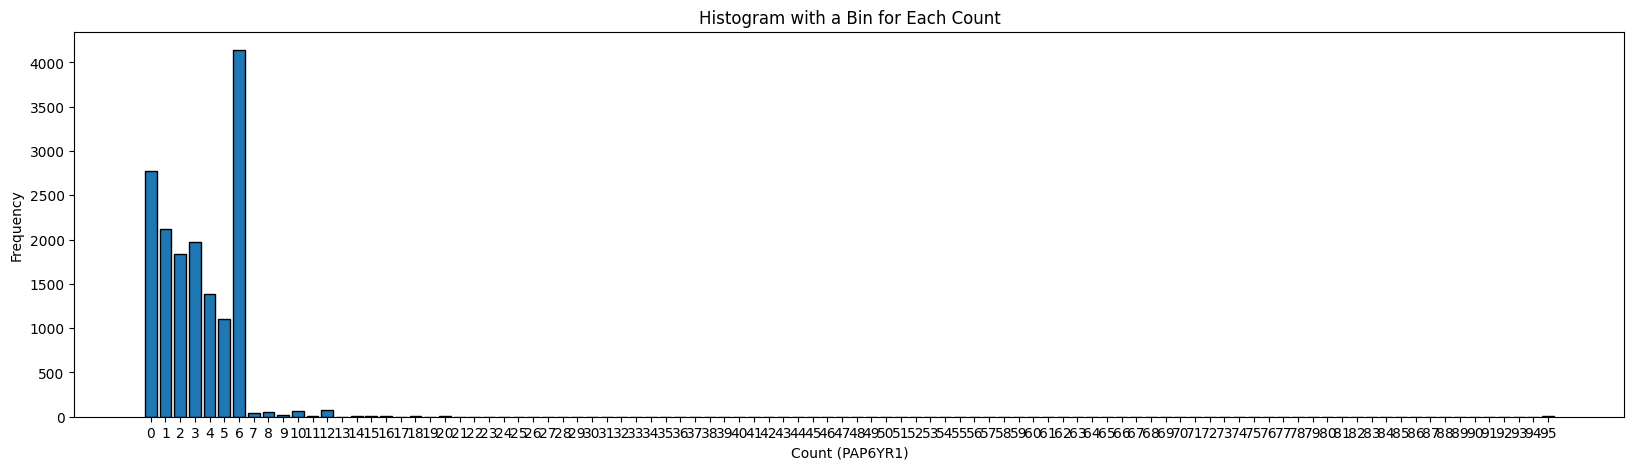

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data
data = df_female_clean['PAP6YR1']

# Create bins such that each integer (0, 1, 2...) is centered in its own bin
# The range goes from -0.5 to max+0.5 to capture the full integer range
bins = np.arange(data.min(), data.max() + 2) - 0.5
plt.figure(figsize=(20, 5))
plt.hist(data, bins=bins, edgecolor='black', rwidth=0.8)
plt.xticks(np.arange(data.min(), data.max() + 1)) # Label every integer on x-axis
plt.xlabel('Count (PAP6YR1)')
plt.ylabel('Frequency')
plt.title('Histogram with a Bin for Each Count')
plt.show()

In [282]:
df_female_clean['HPVHRD'].isna().sum()

4234

In [ ]:
mask1=df_female_clean['HPVHRD'].notna()

(array([ 857., 1779., 1856., 1471., 1783., 2006., 1661., 1783., 1192.,
        1259.]),
 array([18. , 24.7, 31.4, 38.1, 44.8, 51.5, 58.2, 64.9, 71.6, 78.3, 85. ]),
 <BarContainer object of 10 artists>)

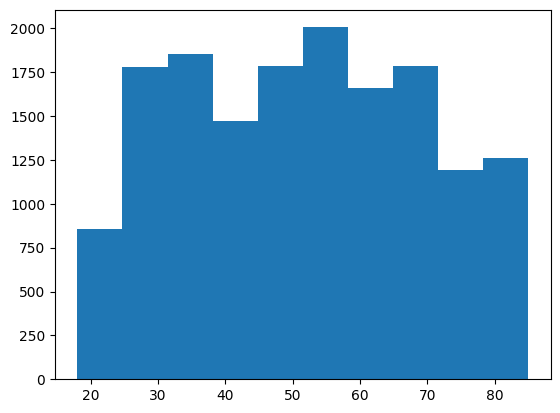

In [ ]:
plt.hist(df_female_clean_info['AGE_P'])

In [ ]:
# region
# marital

In [275]:
df_female_clean['HPVHRD'].value_counts()

HPVHRD
1.0    8745
2.0    2628
9.0      32
8.0       5
7.0       3
Name: count, dtype: int64

In [324]:
# libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.genmod.generalized_linear_model import SET_USE_BIC_LLF
from scipy.stats import nbinom
import random
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
import math

# Import custom modules and functions
from AIC_BIC import calculate_aic_bic

# Import model classes
from models.ZKIHurdlePoisson import ZKHurdlePoisson
from models.ZKIHurdleNB import ZKHurdleNB
from models.ZINB import ZINB_EM, predict_mean as ZINB_pred_mean
from models.ZIP import ZIP_EM, predict_mean as ZIP_pred_mean
from models.ZKINB import ZkINB_EM
from models.ZKIP import ZKIP_EM
from models.ZkICMP import ZkICMP

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import HistGradientBoostingRegressor
from models.ZKHurdleRF import ZKHurdleRF

In [331]:
np.floor([1, 2, 6, 4])

array([1., 2., 6., 4.])

In [361]:
# all functions
class ModelEvaluator:
    """Class to evaluate and compare different count data models."""
    
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.n_train = X_train.shape[0]
        self.results = {}
    
    def evaluate_model(self, model_name, y_pred_test, y_pred_train, llf, k_params):
        """Calculate evaluation metrics for a model."""
        metrics = {
            'mse_test': mean_squared_error(self.y_test, y_pred_test),
            'mae_test': mean_absolute_error(self.y_test, y_pred_test),
            'r2_test': r2_score(self.y_test, y_pred_test),
            'mse_train': mean_squared_error(self.y_train, y_pred_train),
            'mae_train': mean_absolute_error(self.y_train, y_pred_train),
            'r2_train': r2_score(self.y_train, y_pred_train),
            'llf': llf,
            'aic': calculate_aic_bic(self.n_train, llf, k_params)[0],
            'bic': calculate_aic_bic(self.n_train, llf, k_params)[1]
        }
        for i in range(0, 7):
            metrics[f'{i}_correct']=((np.floor(y_pred_test)==i)).mean()
            
        self.results[model_name] = metrics
        return metrics
    
class ModelEvaluatorML:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.n_train = X_train.shape[0]
        self.results = {}
    
    def evaluate_model(self, model_name, y_pred_test, y_pred_train):
        """Calculate evaluation metrics for a model."""
        metrics = {
            'mse_test': mean_squared_error(self.y_test, y_pred_test),
            'mae_test': mean_absolute_error(self.y_test, y_pred_test),
            'r2_test': r2_score(self.y_test, y_pred_test),
            'mse_train': mean_squared_error(self.y_train, y_pred_train),
            'mae_train': mean_absolute_error(self.y_train, y_pred_train),
            'r2_train': r2_score(self.y_train, y_pred_train)
        }

        for i in range(0, 7):
            metrics[f'{i}_correct']=((np.floor(y_pred_test)==i)).mean()
        
        self.results[model_name] = metrics
        return metrics

def define_model_parameters():
    """Define parameter counts for different models."""
    return {
        'poisson': 2,
        'negative_binomial': 3,  # if r known (2)
        'zk_hurdle_poisson': 4,  # 2+2
        'zk_hurdle_nb': 5, # 2+2+1 , 1 for alpha
        'zinb': 5,  # if r known (2+2+1)
        'zip': 4,  # 2+2
        'zkinb': 7,  # if r known (2+2+2+1)
        'zkip': 6,  # 2+2+2
        'zkicmp': 7  # 2+2+2+1
    }

def fit_models(X_train, X_test, y_train, y_test, k):
    # Configuration
    SET_USE_BIC_LLF(True)
    
    # Get parameter counts
    param_counts = define_model_parameters()
    
    # Initialize evaluator
    evaluator = ModelEvaluator(X_train, X_test, y_train, y_test)
    
    # 1. Poisson Model
    #print("Fitting Poisson model...")
    try:
        poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
        poisson_pred = poisson_model.predict(X_test)
        poisson_pred_train = poisson_model.predict(X_train)
        evaluator.evaluate_model(
            'pois', poisson_pred, poisson_pred_train, poisson_model.llf, param_counts['poisson']
        )
    except Exception as e:
        print(e)
    
    # 2. Negative Binomial Model
    #print("Fitting Negative Binomial model...")
    try:
        nb_model = sm.NegativeBinomial(y_train, X_train).fit(disp=0)
        nb_pred = nb_model.predict(X_test)
        nb_pred_train = nb_model.predict(X_train)
        evaluator.evaluate_model(
            'nb', nb_pred, nb_pred_train, nb_model.llf, param_counts['negative_binomial']
        )
    except Exception as e:
        print(e)
    
    # 3. Zero-K Inflated Poisson Hurdle Model
    #print("Fitting Zero-K Inflated Poisson Hurdle model...")
    try:
        zkihurdle_model = ZKHurdlePoisson(k)
        zkihurdle_res = zkihurdle_model.fit(X_train, y_train)
        zkihurdle_ll = zkihurdle_model.loglikelihood(X_train, y_train)
        zkihurdle_pred = zkihurdle_model.predict_mean(X_test)
        zkihurdle_pred_train = zkihurdle_model.predict_mean(X_train)
        evaluator.evaluate_model(
            'zk_h_p', zkihurdle_pred, zkihurdle_pred_train, zkihurdle_ll, param_counts['zk_hurdle_poisson']
        )
    except Exception as e:
        print(e)

    # 5. ZKIHurdleNB Model
    try:
        zkihurdlenb_modle=ZKHurdleNB(k, alpha=1/1.53)
        zkihurdlenb_modle.fit(X_train, y_train)
        zkihurdlenb_pred=zkihurdlenb_modle.predict_mean(X_test)
        zkihurdlenb_pred_train=zkihurdlenb_modle.predict_mean(X_train)
        zkihurdlenb_ll=zkihurdlenb_modle.loglikelihood(X_train, y_train)
        evaluator.evaluate_model(
            'zk_h_nb', zkihurdlenb_pred, zkihurdlenb_pred_train, zkihurdlenb_ll, param_counts['zk_hurdle_nb']
        )
    except Exception as e:
        print(e)

    # 4. ZINB Model
    #print("Fitting ZINB model...")
    try:
        alpha = 1/1.53
        beta, gamma, zinb_ll = ZINB_EM(y_train.values, X_train.values, X_train.values, alpha)
        zinb_pred = ZINB_pred_mean(X_test.values, X_test.values, beta, gamma)
        zinb_pred_train = ZINB_pred_mean(X_train.values, X_train.values, beta, gamma)
        evaluator.evaluate_model(
            'zinb', zinb_pred, zinb_pred_train, zinb_ll, param_counts['zinb']
        )
    except Exception as e:
        print(e)
    
    # 5. ZIP Model
    #print("Fitting ZIP model...")
    try:
        beta, gamma, zip_ll = ZIP_EM(y_train.values, X_train.values, X_train.values)
        zip_pred = ZIP_pred_mean(X_test.values, X_test.values, beta, gamma)
        zip_pred_train = ZIP_pred_mean(X_train.values, X_train.values, beta, gamma)   
        evaluator.evaluate_model(
            'zip', zip_pred, zip_pred_train, zip_ll, param_counts['zip']
        )
    except Exception as e:
        print(e)

    # 6. ZKINB Model
    #print("Fitting ZKINB model...")
    try:
        zkinb_model = ZkINB_EM()
        zkinb_res = zkinb_model.fit_em(y_train.values, X_train.values, X_train.values, k)
        zkinb_pred = zkinb_model.predict(X_test.values, X_test.values)
        zkinb_pred_train = zkinb_model.predict(X_train.values, X_train.values)
        evaluator.evaluate_model(
            'zkinb', zkinb_pred, zkinb_pred_train, zkinb_res['final_loglik'], param_counts['zkinb']
        )
    except Exception as e:
        print(e)

    # 7. ZKIP Model
    #print("Fitting ZKIP model...")
    try:
        zkip_model = ZKIP_EM(k_inflated=k)
        zkip_res = zkip_model.fit(X_train.values, y_train.values)
        zkip_pred = zkip_model.predict_expected(X_test.values)
        zkip_pred_train = zkip_model.predict_expected(X_train.values)
        evaluator.evaluate_model(
            'zkip', zkip_pred, zkip_pred_train, zkip_res.final_loglik, param_counts['zkip']
        )
    except Exception as e:
        print(e)

    '''
    # 8. ZkICMP Model
    print("Fitting ZkICMP model...")
    zkicmp_model = ZkICMP(k=k)
    zkicmp_res = zkicmp_model.fit(X_train.values, y_train.values)
    pred_results = zkicmp_model.predict(X_test.values)
    _, _, zkicmp_pred, _ = pred_results
    evaluator.evaluate_model(
        'zkicmp', zkicmp_pred, -zkicmp_res.final_loglik, param_counts['zkicmp']
    )
    '''
    
    results = {}
    for model_name, metrics in evaluator.results.items():
        results[f'{model_name.upper()}_MSE_test'] = metrics['mse_test']
        results[f'{model_name.upper()}_MAE_test'] = metrics['mae_test']
        results[f'{model_name.upper()}_R2_test'] = metrics['r2_test']
        results[f'{model_name.upper()}_MSE_train'] = metrics['mse_train']
        results[f'{model_name.upper()}_MAE_train'] = metrics['mae_train']
        results[f'{model_name.upper()}_R2_train'] = metrics['r2_train']
        results[f'{model_name.upper()}_LLF'] = metrics['llf']
        results[f'{model_name.upper()}_AIC'] = metrics['aic']
        results[f'{model_name.upper()}_BIC'] = metrics['bic']
        for i in range(0, 7):
                results[f'{model_name.upper()}_{i}_correct'] = metrics[f'{i}_correct']
    
    return results

def fit_ML_models(X_train, X_test, y_train, y_test, k):
    # Initialize evaluator
    evaluator = ModelEvaluatorML(X_train, X_test, y_train, y_test)

    # RandomForestRegressor
    try:
        rf = RandomForestRegressor(
                n_estimators=300,
                criterion="poisson",
                min_samples_leaf=20,
                n_jobs=-1,
                random_state=42
            )
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        y_pred_train_rf = rf.predict(X_train)
        evaluator. evaluate_model('RF', y_pred_rf, y_pred_train_rf)
    except Exception as e:
        print(e)
    
    # HistGradientBoostingRegressor with Poisson loss
    try:
        poisson_GB = HistGradientBoostingRegressor(
                    loss='poisson',        # This is the key - uses Poisson likelihood
                    random_state=42,
                    max_iter=100,
                    learning_rate=0.1,
                    max_depth=6,
                    min_samples_leaf=20    # Good for count data to prevent overfitting
                )
        poisson_GB.fit(X_train, y_train)
        y_pred_gb = poisson_GB.predict(X_test)
        y_pred_train_gb = poisson_GB.predict(X_train)
        evaluator. evaluate_model('GB', y_pred_gb, y_pred_train_gb)
    except Exception as e:
        print(e)

    try:
        zk_h_rf = ZKHurdleRF(k=k)
        zk_h_rf.fit(X_train, y_train)
        y_pred_zkh_rf = zk_h_rf.predict_mean(X_test)
        y_pred_train_zkh_rf = zk_h_rf.predict_mean(X_train)
        evaluator. evaluate_model('zk_h_rf', y_pred_zkh_rf, y_pred_train_zkh_rf)
    except Exception as e:
        print(e)

    results = {}
    for model_name, metrics in evaluator.results.items():
        results[f'{model_name.upper()}_MSE_test'] = metrics['mse_test']
        results[f'{model_name.upper()}_MAE_test'] = metrics['mae_test']
        results[f'{model_name.upper()}_R2_test'] = metrics['r2_test']
        results[f'{model_name.upper()}_MSE_train'] = metrics['mse_train']
        results[f'{model_name.upper()}_MAE_train'] = metrics['mae_train']
        results[f'{model_name.upper()}_R2_train'] = metrics['r2_train']
        for i in range(0, 7):
                results[f'{model_name.upper()}_{i}_correct'] = metrics[f'{i}_correct']
    return results

def check_for_nan(X_train, X_test, y_train, y_test):
    """Check for NaN values in data."""
    checks = {
        'X_train_nan': np.any(np.isnan(X_train.values)),
        'X_test_nan': np.any(np.isnan(X_test.values)),
        'y_train_nan': np.any(np.isnan(y_train.values)),
        'y_test_nan': np.any(np.isnan(y_test.values)),
        'X_train_inf': np.any(np.isinf(X_train.values)),
        'y_train_inf': np.any(np.isinf(y_train.values))
    }
    return checks


In [363]:
results = []
results_r2_minus = []
problmatic_para = []
err=[]

In [364]:
X.isna().sum()

intercept    0
AGE_P        0
R_MARITL     0
REGION       0
HPVHRD       0
HPVPAP       0
dtype: int64

In [381]:
# initialize
k = 6
n = 15647
test_size=0.3
# Split data indexes
X = df_female_clean_info.loc[mask1, ['AGE_P','R_MARITL', 'REGION']].join(df_female_clean.loc[mask1, ['HPVHRD', 'HPVPAP']]).values
y_target = df_female_clean.loc[mask1, 'PAP6YR1'].values
# Add intercept
X = sm.add_constant(X)
X = pd.DataFrame(X, columns=['intercept', 'AGE_P','R_MARITL', 'REGION', 'HPVHRD', 'HPVPAP'])
y_target = pd.Series(y_target, name='y')

n=X.shape[0]
train_ind, test_ind = train_test_split(
        np.arange(0, n), 
        test_size=test_size, random_state=100
    )
                                
X_train = X.iloc[train_ind, :]
X_test = X.iloc[test_ind, :]
y_train = y_target.iloc[train_ind]
y_test = y_target.iloc[test_ind]

In [383]:
# fit models
p_0 = (y_train == 0).mean()
p_k = (y_train == k).mean()
p_p = max(1 - p_0 - p_k, 0)
y_mean = y_train.mean()
y_std = y_train.std()
n_unique = len(pd.Series(y_train).value_counts())


checks = check_for_nan(X_train, X_test, y_train, y_test)

if any(checks.values()):
   print(f"NaN/Inf found: {checks}")
   print(f"y_mean: {y_mean}, y_std: {y_std}")
   print(f"y_std^2 - y_mean: {y_std**2 - y_mean}")

if not min(p_0, p_k, p_p) >= 3/(n*(1-test_size)):
    problmatic_para.append({
                                'p_0': p_0,
                                'p_k': p_k,
                                'p_p': p_p,
                                'y_mean': y_mean,
                                'y_std': y_std,
                                'n_unique': n_unique
                            })
                                    
else:
                        # Calculate statistics
                        y_mean = y_train.mean()
                        y_std = y_train.std()
                        n_unique = len(pd.Series(y_train).value_counts())
                        
                        # Estimate r for negative binomial
                        if y_std**2 > y_mean:
                            r_hat = y_mean**2 / max(y_std**2 - y_mean, 1e-9)
                            p0_nb = nbinom.pmf(0, r_hat, r_hat/(r_hat + y_mean))
                            pk_nb = nbinom.pmf(k, r_hat, r_hat/(r_hat + y_mean))
                            zero_inflated = p_0 > p0_nb 
                            k_inflated = p_k > pk_nb 
                            # Fit models
                            try:
                                model_results = fit_models(X_train, X_test, y_train, y_test, k)
                                ml_model_results=fit_ML_models(X_train, X_test, y_train, y_test, k)
                                results.append({
                                            'p_0': p_0,
                                            'p_k': p_k,
                                            'p_p': p_p,
                                            'y_mean': y_mean,
                                            'y_std': y_std,
                                            'n_unique': n_unique,
                                            'r_hat': r_hat,
                                            'p0_nb': p0_nb,
                                            'pk_nb': pk_nb,
                                            'zero_inflated': zero_inflated,
                                            'k_inflated': k_inflated,
                                    } | model_results
                                      | ml_model_results)
                            except Exception as e:
                                print(e)
                                err.append({
                                    'p_0': p_0,
                                    'p_k': p_k,
                                    'p_p': p_p,
                                    'y_mean': y_mean,
                                    'y_std': y_std,
                                    'n_unique': n_unique
                                })
                        else:
                            r_hat = np.nan
                            p0_nb = np.nan
                            pk_nb = np.nan
                            results_r2_minus.append({
                                            'p_0': p_0,
                                            'p_k': p_k,
                                            'p_p': p_p,
                                            'y_mean': y_mean,
                                            'y_std': y_std,
                                            'n_unique': n_unique,
                                        })
        



In [346]:
results

[{'p_0': 0.08411565903116786,
  'p_k': 0.3188133683815246,
  'p_p': 0.5970709725873076,
  'y_mean': 3.839404180748529,
  'y_std': 3.401135255620994,
  'n_unique': 28,
  'r_hat': 1.9074042584376796,
  'p0_nb': 0.12200677013309526,
  'pk_nb': 0.06538438245078443,
  'zero_inflated': False,
  'k_inflated': True,
  'POIS_MSE_test': 7.568690499976595,
  'POIS_MAE_test': 1.968387922833495,
  'POIS_R2_test': 0.026681747764806696,
  'POIS_MSE_train': 11.381799744674845,
  'POIS_MAE_train': 2.0397334716924176,
  'POIS_R2_train': 0.01594924528873809,
  'POIS_LLF': -19679.129168525687,
  'POIS_AIC': 39362.258337051375,
  'POIS_BIC': 39376.22997880034,
  'POIS_0_correct': 0.0,
  'POIS_1_correct': 0.0005841121495327102,
  'POIS_2_correct': 0.0014602803738317756,
  'POIS_3_correct': 0.0911214953271028,
  'POIS_4_correct': 0.04994158878504673,
  'POIS_5_correct': 0.0,
  'POIS_6_correct': 0.0,
  'NB_MSE_test': 7.567403170216254,
  'NB_MAE_test': 1.9688930383444398,
  'NB_R2_test': 0.026847295761833423,

In [384]:
results_df=pd.DataFrame(results)
results_r2_minus=pd.DataFrame(results_r2_minus)
problmatic_para=pd.DataFrame(problmatic_para)
err=pd.DataFrame(err)

In [385]:
results_df.columns

Index(['p_0', 'p_k', 'p_p', 'y_mean', 'y_std', 'n_unique', 'r_hat', 'p0_nb',
       'pk_nb', 'zero_inflated',
       ...
       'ZK_H_RF_MSE_train', 'ZK_H_RF_MAE_train', 'ZK_H_RF_R2_train',
       'ZK_H_RF_0_correct', 'ZK_H_RF_1_correct', 'ZK_H_RF_2_correct',
       'ZK_H_RF_3_correct', 'ZK_H_RF_4_correct', 'ZK_H_RF_5_correct',
       'ZK_H_RF_6_correct'],
      dtype='object', length=178)

In [371]:
r2_train=['POIS_R2_train', 'NB_R2_train', 'ZK_H_P_R2_train', 'ZK_H_NB_R2_train', 'ZINB_R2_train', 'ZIP_R2_train', 'ZKINB_R2_train', 'ZKIP_R2_train', 'RF_R2_train', 'GB_R2_train', 'ZK_H_RF_R2_train']
r2=['POIS_R2_test', 'NB_R2_test', 'ZK_H_P_R2_test', 'ZK_H_NB_R2_test', 'ZINB_R2_test', 'ZIP_R2_test', 'ZKINB_R2_test', 'ZKIP_R2_test', 'RF_R2_test', 'GB_R2_test', 'ZK_H_RF_R2_test']
AIC=['POIS_AIC', 'NB_AIC', 'ZK_H_P_AIC', 'ZK_H_NB_AIC', 'ZINB_AIC', 'ZIP_AIC', 'ZKINB_AIC', 'ZKIP_AIC']
mse=['POIS_MSE_test', 'NB_MSE_test', 'ZK_H_P_MSE_test', 'ZK_H_NB_MSE_test', 'ZINB_MSE_test', 'ZIP_MSE_test', 'ZKINB_MSE_test', 'ZKIP_MSE_test', 'RF_MSE_test', 'GB_MSE_test']
mae_train=['POIS_MAE_train', 'NB_MAE_train', 'ZK_H_P_MAE_train', 'ZK_H_NB_MAE_train', 'ZINB_MAE_train', 'ZIP_MAE_train', 'ZKINB_MAE_train', 'ZKIP_MAE_train', 'RF_MAE_train', 'GB_MAE_train', 'ZK_H_RF_MAE_train']
mae=['POIS_MAE_test', 'NB_MAE_test', 'ZK_H_P_MAE_test', 'ZK_H_NB_MAE_test', 'ZINB_MAE_test', 'ZIP_MAE_test', 'ZKINB_MAE_test', 'ZKIP_MAE_test', 'RF_MAE_test', 'GB_MAE_test', 'ZK_H_RF_MAE_test']


In [372]:
results_df[mae]

,POIS_MAE_test,NB_MAE_test,ZK_H_P_MAE_test,ZK_H_NB_MAE_test,ZINB_MAE_test,ZIP_MAE_test,ZKINB_MAE_test,ZKIP_MAE_test,RF_MAE_test,GB_MAE_test,ZK_H_RF_MAE_test
0,1.968388,1.968893,1.963346,1.963591,1.968727,1.962609,1.98064,1.97845,1.924719,1.968064,1.937839


In [386]:
models=['POIS', 'NB', 'ZK_H_P', 'ZK_H_NB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP', 'RF', 'GB', 'ZK_H_RF']
z_col=[]
for i in models:
    z_col.append(f'{i}_3_correct')

In [387]:
results_df[z_col]

,POIS_3_correct,NB_3_correct,ZK_H_P_3_correct,ZK_H_NB_3_correct,ZINB_3_correct,ZIP_3_correct,ZKINB_3_correct,ZKIP_3_correct,RF_3_correct,GB_3_correct,ZK_H_RF_3_correct
0,0.619451,0.632301,0.555199,0.559871,0.626168,0.55403,0.762558,0.70882,0.464953,0.472255,0.600175
1,0.619451,0.632301,0.555199,0.559871,0.626168,0.55403,0.762558,0.70882,0.464953,0.472255,0.600175


In [389]:
import numpy as np
from scipy.stats import poisson

# ----------------------------
# Step 1: sample size
# ----------------------------
n = 10_000

# ----------------------------
# Step 2: Poisson means
# (heterogeneous, like regression output)
# ----------------------------
np.random.seed(0)
lam = np.random.uniform(0.2, 1.0, size=n)

# ----------------------------
# Step 3: define bins
# ----------------------------
bins = {
    "0": [0],
    "1": [1],
    "2-3": [2, 3],
    "4-5": [4, 5],
    "6-7": [6, 7],
    "8-9": [8, 9],
    "10-12": [10, 11, 12],
    ">12": list(range(13, 50))
}

# ----------------------------
# Step 4: compute expected counts
# ----------------------------
expected_counts = {}

for name, ys in bins.items():
    print(ys)
    # sum_y P(Y_i = y) for each i, then sum over i
    prob = np.zeros(n)
    for y in ys:
        prob += poisson.pmf(y, lam)
    expected_counts[name] = prob.sum()

# ----------------------------
# Step 5: print results
# ----------------------------
print("Model-implied expected frequency counts (Poisson):\n")
total = 0
for k, v in expected_counts.items():
    print(f"{k:>6s} : {v:8.2f}")
    total += v

print("\nTotal expected count:", total)


[0]
[1]
[2, 3]
[4, 5]
[6, 7]
[8, 9]
[10, 11, 12]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Model-implied expected frequency counts (Poisson):

     0 :  5652.45
     1 :  3075.67
   2-3 :  1218.06
   4-5 :    52.65
   6-7 :     1.16
   8-9 :     0.02
 10-12 :     0.00
   >12 :     0.00

Total expected count: 10000.0
